 **Dados de exportaçao de vinho**

In [185]:
#bibliotecas utilizadas no codigo
import pandas as pd
import matplotlib
import matplotlib.pyplot as plp
import matplotlib.ticker as ticker
import seaborn as sns

In [186]:
#leitura de arquivo csv contendo dados da exportaçao de vinho feita por vinicula brasileira, com ajuste de formato dos dados
dados_exportacaovinho = pd.read_csv('/content/ExpVinho.csv', sep=';')
pd.options.display.float_format = '{:.2f}'.format
dados_exportacaovinho.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,46
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,0,0,26,95,4,21,0,0
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,15467,87702,10794,45382,3660,25467,6261,32605,2698,6741
3,4,Angola,0,0,0,0,0,0,0,0,...,10170,61680,477,709,345,1065,0,0,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
# colunas de pais indicada como index para visualizaçao
expvinho_colunas_usaveis = dados_exportacaovinho.set_index("País")
expvinho_colunas_usaveis.index.name = None
expvinho_colunas_usaveis.head()

,Id,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,...,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1
Afeganistão,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,46
África do Sul,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,26,95,4,21,0,0
"Alemanha, República Democrática",3,0,0,0,0,4168,2630,12000,8250,0,...,15467,87702,10794,45382,3660,25467,6261,32605,2698,6741
Angola,4,0,0,0,0,0,0,0,0,0,...,10170,61680,477,709,345,1065,0,0,0,0
Anguilla,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [188]:
#limpeza de tabela com dados de 15 anos (2006-2021)
expvinho_colunas_de_interesse = expvinho_colunas_usaveis.columns[73:]
colunas_filtradas = expvinho_colunas_usaveis[expvinho_colunas_de_interesse]
colunas_filtradas.head()

,2006,2006.1,2007,2007.1,2008,2008.1,2009,2009.1,2010,2010.1,...,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1
Afeganistão,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,46
África do Sul,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,26,95,4,21,0,0
"Alemanha, República Democrática",38302,89231,119512,238052,265742,429970,225086,393482,27715,138666,...,15467,87702,10794,45382,3660,25467,6261,32605,2698,6741
Angola,3766,18293,25931,49753,25721,71083,54786,84235,33557,189891,...,10170,61680,477,709,345,1065,0,0,0,0
Anguilla,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [189]:
#soma da qtde em litros por pais
qtde_litros = colunas_filtradas[[col for col in colunas_filtradas.columns if col.endswith('')]].sum(axis=1)
qtde_litros.rename("Quantidade em litros")

Afeganistão                             57
África do Sul                          146
Alemanha, República Democrática    3887545
Angola                              833971
Anguilla                                 0
                                    ...   
Tuvalu                                   6
Uruguai                             380682
Vanuatu                                 49
Venezuela                           136842
Vietnã                               26780
Name: Quantidade em litros, Length: 124, dtype: int64

In [190]:
#soma de valor em dolar por pais
valor_dolar = colunas_filtradas[[col for col in colunas_filtradas.columns if col.endswith('.1')]].sum(axis=1)

In [ ]:
#inclusao de somas dentro da tabela (rodar apenas uma vez essa parte)
colunas_filtradas.insert(0, 'Quantidade_em_litros', qtde_litros)
colunas_filtradas.insert(1, 'Valor_USS', valor_dolar)
colunas_filtradas

In [196]:
#tabela apenas com pais, qtde em litros e valor em USS
exp_vinho = colunas_filtradas.filter(items=['País', 'Quantidade_em_litros', 'Valor_USS'])

In [ ]:
#ordenaçao de tabela por valor em USS, com gradiente de cor
ordenados_por_valor = exp_vinho.sort_values(by="Valor_USS", ascending=False)
ordenados_por_valor.style.background_gradient(cmap="RdYlGn", subset=['Valor_USS'])

In [ ]:
#grafico com exportaçao de vinho por pais
grafico = ordenados_por_valor
grafico = grafico.sort_values(by="Valor_USS", ascending=False)
grafico = grafico / 1_000_000
axis = grafico[:5].plot(figsize = (12, 6), kind="bar")
axis.set_ylabel("Valor (em milhoes) ")
axis.set_xlabel("Pais")
plp.title("Exportaçao de vinho por pais (2006 - 2021)")

**Dados Consumo de Vinho no mundo**


In [203]:
#analise de consmumo de vinho
dados_consumo = pd.read_excel('/content/Consumption.xlsx')
pd.options.display.float_format = '{:.2f}'.format
dados_consumo_filtrados = dados_consumo.dropna()

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


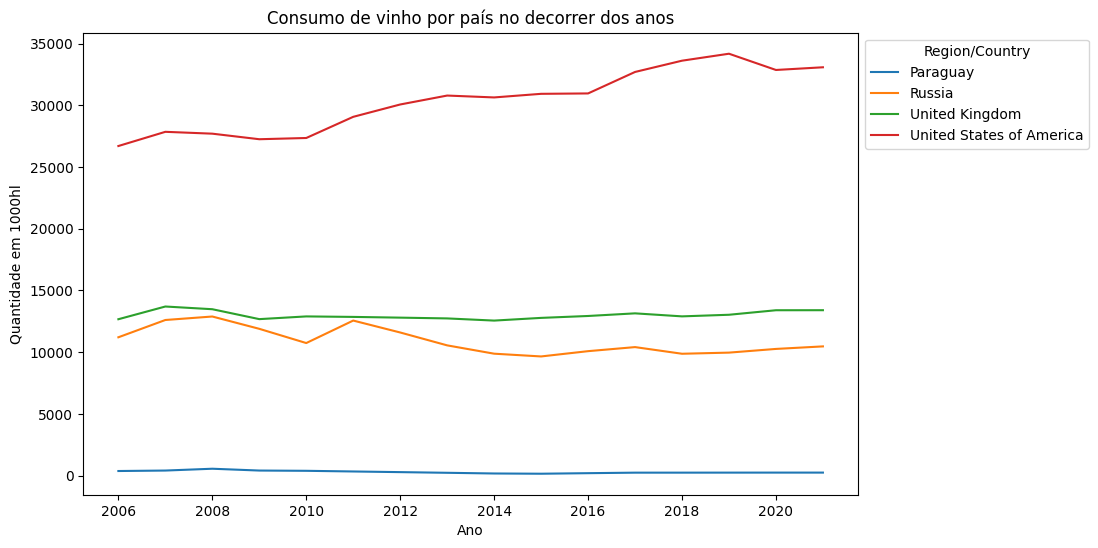

In [204]:
#filtragem de paises de acordo com grafico de exportaçao brasil-mundo
dados_especificos = dados_consumo_filtrados[(dados_consumo_filtrados["Region/Country"]=="Paraguay") | (dados_consumo_filtrados["Region/Country"]=="Russia") | (dados_consumo_filtrados["Region/Country"]=="United States of America") | (dados_consumo_filtrados["Region/Country"]=="United Kingdom") | (dados_consumo_filtrados["Region/Country"]=="China")]
dados_especificos.astype({"Year": int, "Quantity": int})
ax = plp.subplots(figsize=(10, 6))
ax = sns.lineplot(data=dados_especificos, x="Year", y="Quantity", hue="Region/Country")
ax.set_title("Consumo de vinho por país no decorrer dos anos")
ax.set_ylabel("Quantidade em 1000hl")
ax.set_xlabel("Ano")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

**Dados produçao de vinho**

In [ ]:
#analise producao de vinho
dados_producao = pd.read_excel('/content/Production.xlsx')
pd.options.display.float_format = '{:.2f}'.format
dados_producao_filtrados = dados_producao.dropna()

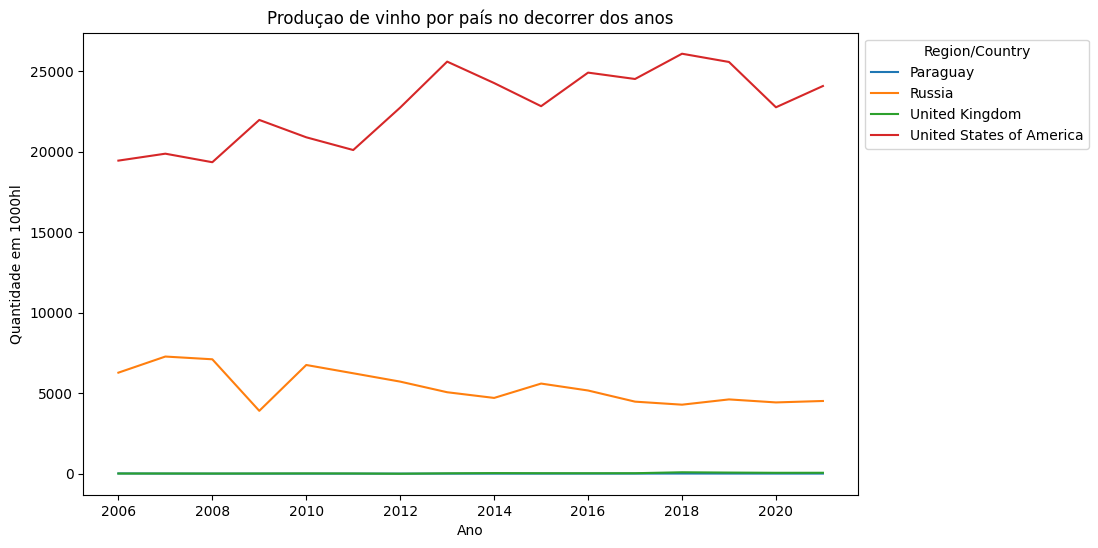

In [205]:
#visualizaçao de produçao de vinho por pais de acordo com grafico de exportaçao brasil-mundo
dados_producao_top_paises = dados_producao_filtrados[(dados_producao_filtrados["Region/Country"]=="Paraguay") | (dados_producao_filtrados["Region/Country"]=="Russia") | (dados_producao_filtrados["Region/Country"]=="United States of America") | (dados_producao_filtrados["Region/Country"]=="United Kingdom") | (dados_producao_filtrados["Region/Country"]=="China")]
dados_producao_top_paises.astype({"Year": int, "Quantity": int})
ax = plp.subplots(figsize=(10, 6))
ax = sns.lineplot(data=dados_producao_top_paises, x="Year", y="Quantity", hue="Region/Country")
ax.set_title("Produçao de vinho por país no decorrer dos anos")
ax.set_ylabel("Quantidade em 1000hl")
ax.set_xlabel("Ano")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

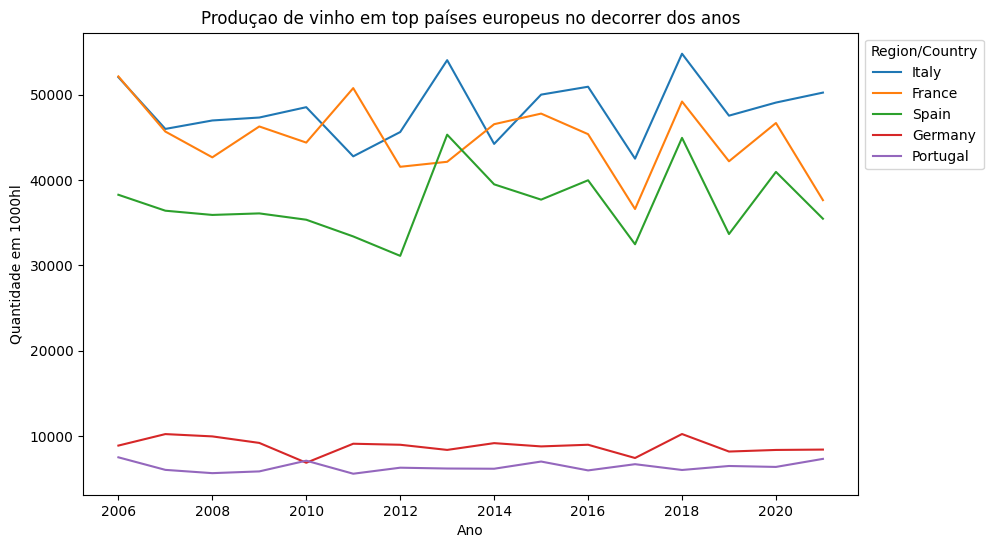

In [206]:
#visualizaçao de produçao de vinho por pais com baixa exportaçao brasil-mundo
dados_producao_top_continentes = dados_producao_filtrados[(dados_producao_filtrados["Region/Country"]=="Italy") | (dados_producao_filtrados["Region/Country"]=="France") | (dados_producao_filtrados["Region/Country"]=="Spain") | (dados_producao_filtrados["Region/Country"]=="Germany") | (dados_producao_filtrados["Region/Country"]=="Portugal")]
dados_producao_top_continentes.astype({"Year": int, "Quantity": int})
dados_producao_top_continentes = dados_producao_top_continentes.sort_values(by="Quantity", ascending=False)
ax = plp.subplots(figsize=(10, 6))
ax = sns.lineplot(data=dados_producao_top_continentes, x="Year", y="Quantity", hue="Region/Country")
ax.set_title("Produçao de vinho em top países europeus no decorrer dos anos")
ax.set_ylabel("Quantidade em 1000hl")
ax.set_xlabel("Ano")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))